<a href="https://colab.research.google.com/github/GutemaB2015/Gutema-thesis/blob/main/confusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BENIGN           1356
DoS Hulk         1184
DoS slowloris     459
Name: Label, dtype: int64
Decision Tree Classiffier Accuracy: 0.9705159705159705
[[289   0   0]
 [  0 245  24]
 [  0   0 256]]


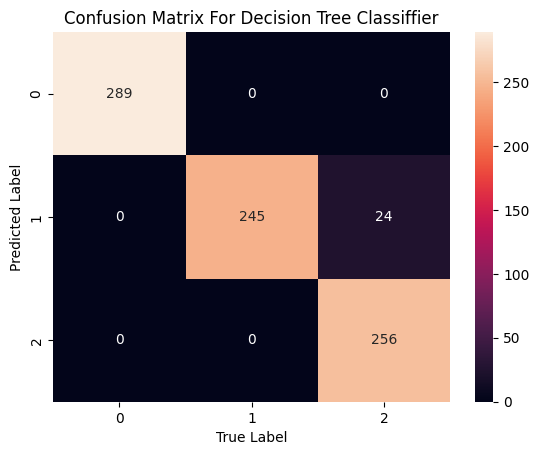

****************************************************************************************************
Random Forest Classifier Accuracy: 0.9705159705159705
[[289   0   0]
 [  0 245  24]
 [  0   0 256]]


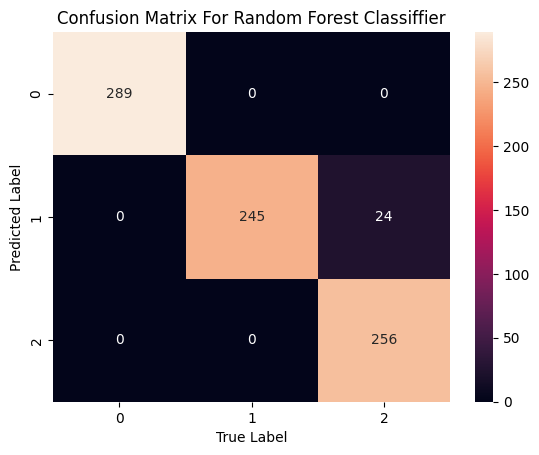

****************************************************************************************************
Naive Bayes's  Algorithm Accuracy: 0.9262899262899262
[[256  33   0]
 [  3 249  17]
 [  0   7 249]]


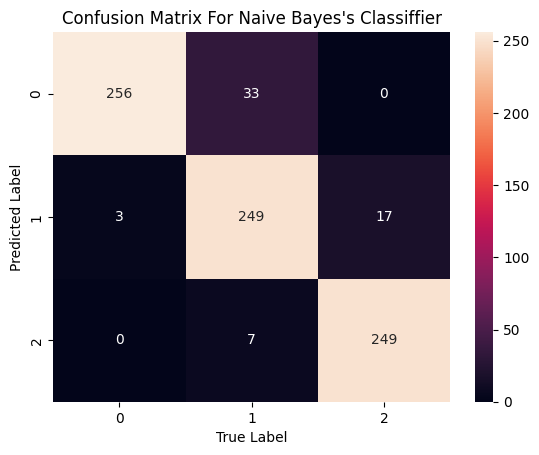

****************************************************************************************************
K-Nearest Neighbour Accuracy: 0.9705159705159705
[[277  12   0]
 [  2 260   7]
 [  0   3 253]]


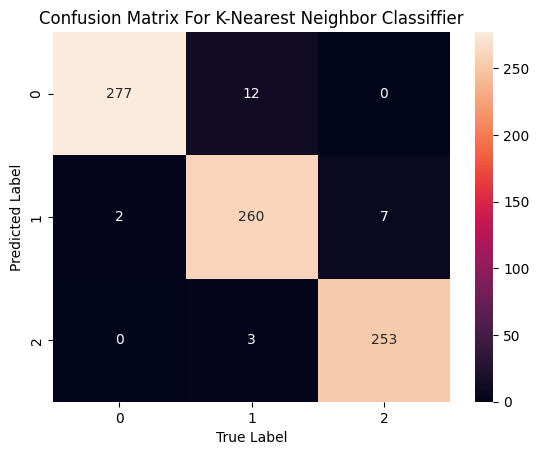

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression algorithm Accuracy: 0.9557739557739557
[[288   1   0]
 [ 11 245  13]
 [  7   4 245]]


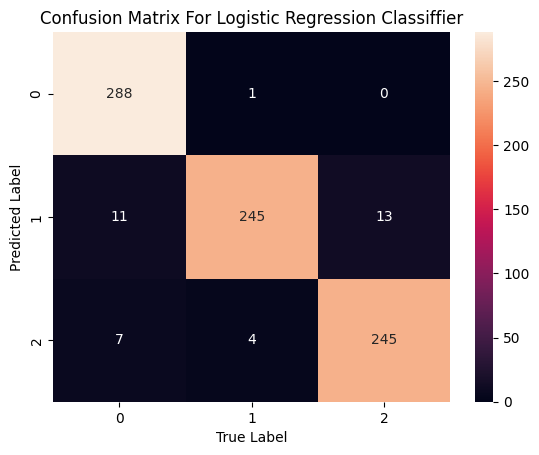

****************************************************************************************************
SVM Classifier Accuracy: 0.9754299754299754
[[281   6   2]
 [  3 258   8]
 [  0   1 255]]


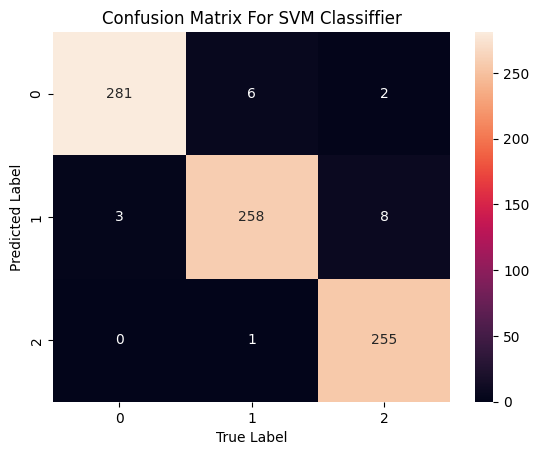

****************************************************************************************************


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Dataset URL
DatasetUrl = 'https://raw.githubusercontent.com/GutemaB2015/Gutema-thesis/main/FillDataset.csv'
data = pd.read_csv(DatasetUrl)

# Get the number of frequencies
num_frequencies = data['Label'].value_counts()
# Print the number of frequencies
print(num_frequencies)

label_encoder = preprocessing.LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Extraxt the features you want to base the foundation of our model training
features = ['Max_Packet_Length', 'Fwd_Packet_Length_Max', 'Flow_Packets_Sec', 'Flow_Bytes_Sec', 'Packet_Length_Std',
            'Packet_Length_Variance', 'Flow_IAT_Max', 'Fwd_IAT_Max', 'Subflow_Fwd_Bytes', 'Fwd_Packet_Length_Std',
            'Bwd_Packets_Sec', 'min_seg_size_forward', 'Init_Win_bytes_backward', 'Average_Packet_Size',
            'Packet_Length_Mean', 'Fwd_IAT_Total', 'Flow_IAT_Std', 'Fwd_IAT_Std', 'Avg_Fwd_Segment_Size',
            'Fwd_Packet_Length_Mean', 'Fwd_Header_Length', 'Fwd_IAT_Mean', 'Flow_IAT_Mean', 'Idle_Max', 'Idle_Mean',
            'Fwd_Packets_Sec']

# Replace missing values with the mean of the column
data['Fwd_Packets_Sec'].fillna(data['Fwd_Packets_Sec'].median(), inplace=True)
data['Idle_Mean'].fillna(data['Idle_Mean'].median(), inplace=True)
data['Idle_Max'].fillna(data['Idle_Max'].median(), inplace=True)
data['Flow_IAT_Mean'].fillna(data['Flow_IAT_Mean'].median(), inplace=True)

data['Fwd_IAT_Mean'].fillna(data['Fwd_IAT_Mean'].median(), inplace=True)
data['Fwd_Header_Length'].fillna(data['Fwd_Header_Length'].median(), inplace=True)
data['Fwd_Packet_Length_Mean'].fillna(data['Fwd_Packet_Length_Mean'].median(), inplace=True)
data['Avg_Fwd_Segment_Size'].fillna(data['Avg_Fwd_Segment_Size'].median(), inplace=True)

data['Fwd_IAT_Std'].fillna(data['Fwd_IAT_Std'].median(), inplace=True)
data['Fwd_IAT_Total'].fillna(data['Fwd_IAT_Total'].median(), inplace=True)
data['Flow_IAT_Std'].fillna(data['Flow_IAT_Std'].median(), inplace=True)
data['Packet_Length_Mean'].fillna(data['Packet_Length_Mean'].median(), inplace=True)

data['Average_Packet_Size'].fillna(data['Average_Packet_Size'].median(), inplace=True)
data['Init_Win_bytes_backward'].fillna(data['Init_Win_bytes_backward'].median(), inplace=True)
data['min_seg_size_forward'].fillna(data['min_seg_size_forward'].median(), inplace=True)
data['Bwd_Packets_Sec'].fillna(data['Bwd_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Std'].fillna(data['Fwd_Packet_Length_Std'].median(), inplace=True)
data['Subflow_Fwd_Bytes'].fillna(data['Subflow_Fwd_Bytes'].median(), inplace=True)
data['Fwd_IAT_Max'].fillna(data['Fwd_IAT_Max'].median(), inplace=True)
data['Flow_IAT_Max'].fillna(data['Flow_IAT_Max'].median(), inplace=True)

data['Packet_Length_Variance'].fillna(data['Packet_Length_Variance'].median(), inplace=True)
data['Packet_Length_Std'].fillna(data['Packet_Length_Std'].median(), inplace=True)
data['Flow_Bytes_Sec'].fillna(data['Flow_Bytes_Sec'].median(), inplace=True)
data['Flow_Packets_Sec'].fillna(data['Flow_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Max'].fillna(data['Fwd_Packet_Length_Max'].median(), inplace=True)
data['Max_Packet_Length'].fillna(data['Max_Packet_Length'].median(), inplace=True)

# Define your features and labels
X = data[features]
y = data["Label"]

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Continue with your classification models and performance evaluation as before...
# DEscision Tree Accuracy
dectreClassifier = DecisionTreeClassifier(criterion="entropy", min_samples_split=2, max_depth=2, min_samples_leaf=5)
dectreClassifier = dectreClassifier.fit(X_train, y_train)
y_pred = dectreClassifier.predict(X_test)
dectreClassifieraccuracy = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Classiffier Accuracy:", dectreClassifieraccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Decision Tree Classiffier")
plt.show()
print("****************************************************************************************************")

# Continue with other classifiers...
# Create a logistic regression model
rmfClassifier = RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_split=20, max_features=10)
rmfClassifier.fit(X_train, y_train)
y_pred = rmfClassifier.predict(X_test)
rmfClassifieraccuracy = rmfClassifier.score(X_test, y_test)
print('Random Forest Classifier Accuracy:', rmfClassifieraccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Random Forest Classiffier")
plt.show()
print("****************************************************************************************************")

# Create gaussian naive bayes classifier
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
naiveBayesPreddiction = naiveBayes.predict(X_test)
naiveBayesaccuracy = metrics.accuracy_score(y_test, naiveBayesPreddiction)
print("Naive Bayes's  Algorithm Accuracy:", naiveBayesaccuracy)
confusion = confusion_matrix(y_test, naiveBayesPreddiction)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Naive Bayes's Classiffier")
plt.show()
print("****************************************************************************************************")

# K-Nearest Neighbour Algorithm
knClassifier = KNeighborsClassifier(n_neighbors=5)
knClassifier.fit(X_train, y_train)
predictions = knClassifier.predict(X_test)
knClassifieraccuracy = knClassifier.score(X_test, y_test)
print('K-Nearest Neighbour Accuracy:', knClassifieraccuracy)
confusion = confusion_matrix(y_test, predictions)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For K-Nearest Neighbor Classiffier")
plt.show()
print("****************************************************************************************************")

# Logistic Regression algorithm
logRegression = LogisticRegression(penalty='l2', C=1.0, max_iter=400)
logRegression.fit(X_train, y_train)
y_pred = logRegression.predict(X_test)
logRegressionccuracy = metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression algorithm Accuracy:", logRegressionccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For Logistic Regression Classiffier")
plt.show()
print("****************************************************************************************************")

# Create an SVM classifier
svmClassifier = svm.SVC(kernel='rbf', C=200)
svmClassifier.fit(X_train, y_train)
y_pred = svmClassifier.predict(X_test)
SVMAccuracy = svmClassifier.score(X_test, y_test)
print("SVM Classifier Accuracy:", SVMAccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix For SVM Classiffier")
plt.show()
print("****************************************************************************************************")

Decision Tree Classifier Accuracy: 0.965
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      0.91      0.95       234
           2       0.80      1.00      0.89        83

    accuracy                           0.96       600
   macro avg       0.93      0.97      0.95       600
weighted avg       0.97      0.96      0.97       600

Random Forest Classifier Accuracy: 0.965
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      0.91      0.95       234
           2       0.80      1.00      0.89        83

    accuracy                           0.96       600
   macro avg       0.93      0.97      0.95       600
weighted avg       0.97      0.96      0.97       600

Naive Bayes Algorithm Accuracy:  0.9316666666666666
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Algorithm Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       283
           1       0.98      0.94      0.96       234
           2       0.92      0.94      0.93        83

    accuracy                           0.96       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600

SVM Classifier Accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       283
           1       0.97      0.98      0.97       234
           2       0.93      0.99      0.96        83

    accuracy                           0.97       600
   macro avg       0.96      0.98      0.97       600
weighted avg       0.97      0.97      0.97       600



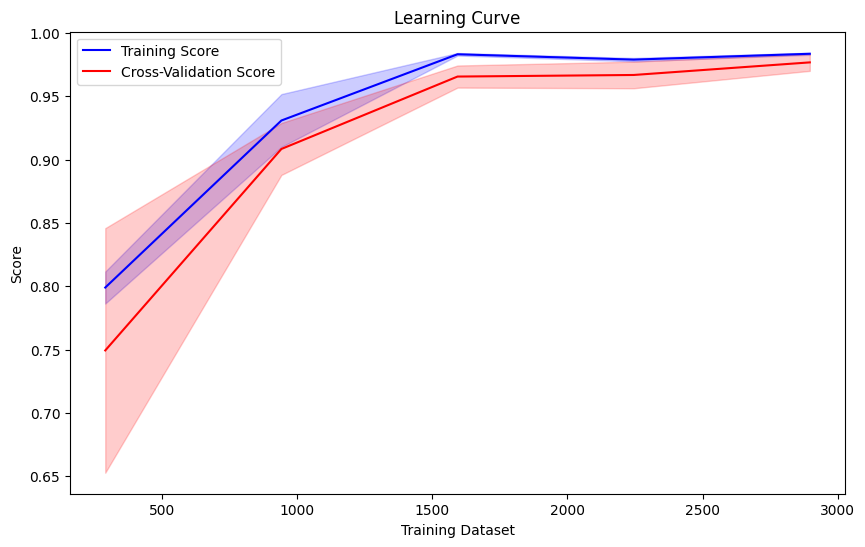

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Dataset URL
DatasetUrl = 'https://raw.githubusercontent.com/GutemaB2015/Gutema-thesis/main/FillDataset.csv'
data = pd.read_csv(DatasetUrl)

# Extract the features you want to base the foundation of our model training
features = ['Max_Packet_Length', 'Fwd_Packet_Length_Max', 'Flow_Packets_Sec', 'Flow_Bytes_Sec', 'Packet_Length_Std',
            'Packet_Length_Variance', 'Flow_IAT_Max', 'Fwd_IAT_Max', 'Subflow_Fwd_Bytes', 'Fwd_Packet_Length_Std',
            'Bwd_Packets_Sec', 'min_seg_size_forward', 'Init_Win_bytes_backward', 'Average_Packet_Size',
            'Packet_Length_Mean', 'Fwd_IAT_Total', 'Flow_IAT_Std', 'Fwd_IAT_Std', 'Avg_Fwd_Segment_Size',
            'Fwd_Packet_Length_Mean', 'Fwd_Header_Length', 'Fwd_IAT_Mean', 'Flow_IAT_Mean', 'Idle_Max', 'Idle_Mean',
            'Fwd_Packets_Sec', 'Active_Std', 'Active_Max', 'Active_Min']

label_encoder = preprocessing.LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data['Label'].fillna(data['Label'].median(), inplace=True)
AttackLabel = data["Label"]



# Fill missing values with the mean of the column
data = data.fillna(data.mean())

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], AttackLabel, test_size=0.2, random_state=1)

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Continue with your machine learning models and evaluations...
# DEcision Tree Accuracy
dectreClassifier = DecisionTreeClassifier(criterion="entropy", min_samples_split=2, max_depth=2, min_samples_leaf=5)
dectreClassifier = dectreClassifier.fit(X_resampled, y_resampled)
y_pred = dectreClassifier.predict(X_test)
print(classification_report(y_test, y_pred))

# The rest of your machine learning code...
# Create a logistic regression model
rmfClassifier = RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_split=20, max_features=10)
rmfClassifier.fit(X_resampled, y_resampled)
y_pred = rmfClassifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Create a Gaussian Naive Bayes classifier
naiveBayes = GaussianNB()
naiveBayes.fit(X_resampled, y_resampled)
naiveBayesPreddiction = naiveBayes.predict(X_test)
print(classification_report(y_test, naiveBayesPreddiction))

# K-Nearest Neighbour Algorithm
knClassifier = KNeighborsClassifier(n_neighbors=5)
knClassifier.fit(X_resampled, y_resampled)
predictions = knClassifier.predict(X_test)
print(classification_report(y_test, predictions))

# Logistic Regression algorithm
logRegression = LogisticRegression(penalty='l2', C=1.0, max_iter=350)
logRegression.fit(X_resampled, y_resampled)
y_pred = logRegression.predict(X_test)
print(classification_report(y_test, y_pred))

# Create an SVM classifier
svmClassifier = SVC(kernel='rbf', C=450)
svmClassifier.fit(X_resampled, y_resampled)
y_pred = svmClassifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(svmClassifier, X_resampled, y_resampled, cv=10)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='red')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='red')
plt.xlabel('Training Dataset')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
